In [1]:
# Set project directory
import os
import sys

def project_dir():
    notebook_path = %pwd
    repo_name = "nsl_kdd"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)

pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
import numpy as np

from sklearn.preprocessing import LabelBinarizer

from data_utils import ATTACK_LABELS_TYPES, load_train_test_data, plot_2d

import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

# Load data

In [3]:
X_PATH = pwd + '/data/saved_X/X_nsl_tsne_without_categorical.npy'
N_X_DATASET = 2

In [4]:
X = np.load(X_PATH)[N_X_DATASET]

X.shape

(148517, 2)

In [5]:
(_, _, Y_train, Y_test), attack_classes = load_train_test_data(pwd=pwd, return_classes=True, standardize=True, norm=False, 
                                                               include_categorical=False, group_y=False)
(_, _, Y_train_grouped, Y_test_grouped), attack_classes_grouped = load_train_test_data(pwd=pwd, return_classes=True, 
                                                                                       standardize=True, norm=False, 
                                                                                       include_categorical=False, group_y=True)

Y = np.vstack([Y_train, Y_test])
Y_grouped = np.vstack([Y_train_grouped, Y_test_grouped])

Y.shape, Y_grouped.shape

((148517, 40), (148517, 5))

In [6]:
data_labels = np.argmax(Y, axis=1)
data_labels_grouped = np.argmax(Y_grouped, axis=1)

data_labels.shape, data_labels_grouped.shape

((148517,), (148517,))

In [7]:
data_classes = np.array([attack_classes[y] for y in data_labels])
data_classes_grouped = np.array([attack_classes_grouped[y] for y in data_labels_grouped])

data_classes.shape, data_classes_grouped.shape

((148517,), (148517,))

In [8]:
data_classes[:10], data_classes_grouped[:10]

(array(['normal', 'normal', 'neptune', 'normal', 'normal', 'neptune',
        'neptune', 'neptune', 'neptune', 'neptune'], dtype='<U15'),
 array(['normal', 'normal', 'DoS', 'normal', 'normal', 'DoS', 'DoS', 'DoS',
        'DoS', 'DoS'], dtype='<U6'))

# Visualise

In [9]:
from matplotlib import pyplot as plt

In [10]:
def plot_2d(X_list, y, subtitles, title, figsize=(24, 7), labels=None, bbox_shift=1.15, s=15, rows=1, cols=3):
    plt.figure(figsize=figsize)
    for i, X in enumerate(X_list):
        plt.subplot(rows, cols, i + 1)
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=s)
        plt.title(subtitles[i])

    handles, classes = scatter.legend_elements()
    if labels is not None:
        classes = labels
    plt.legend(handles, classes, bbox_to_anchor=(bbox_shift, 1.02), loc='upper right')

    plt.suptitle(title)

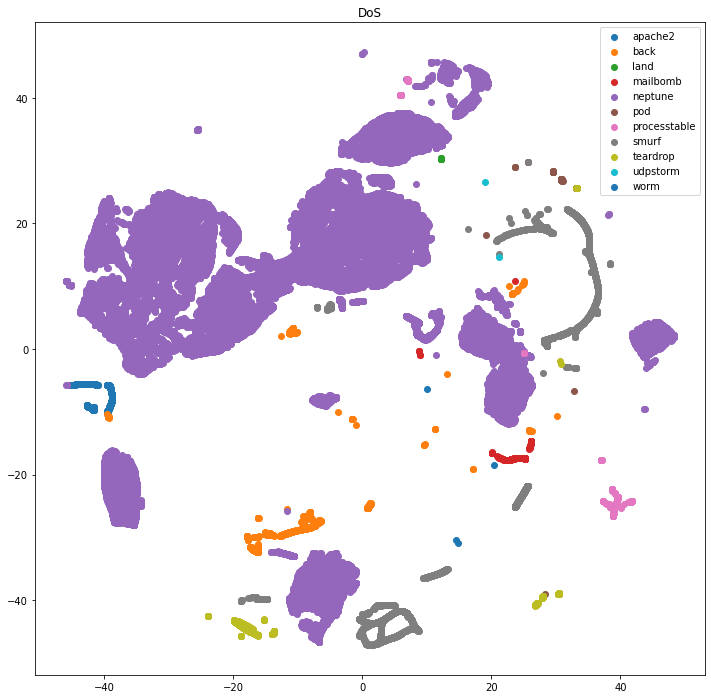

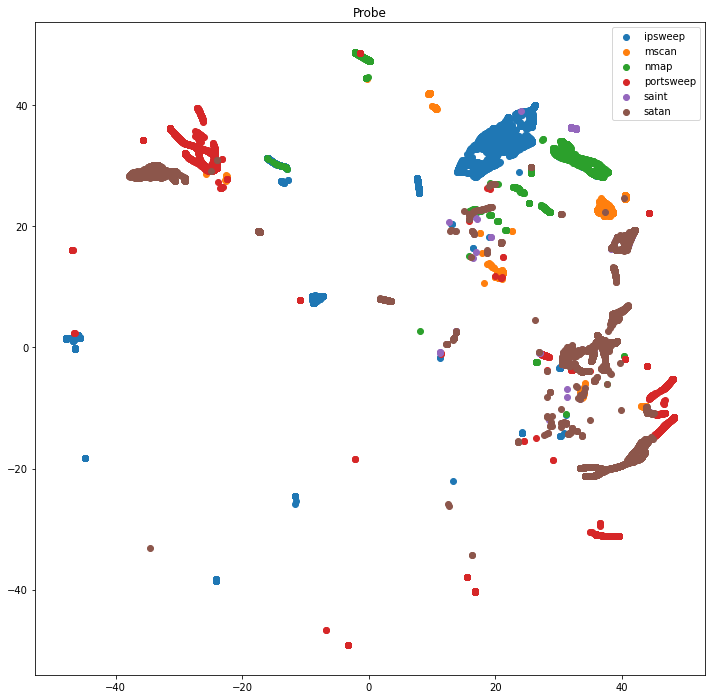

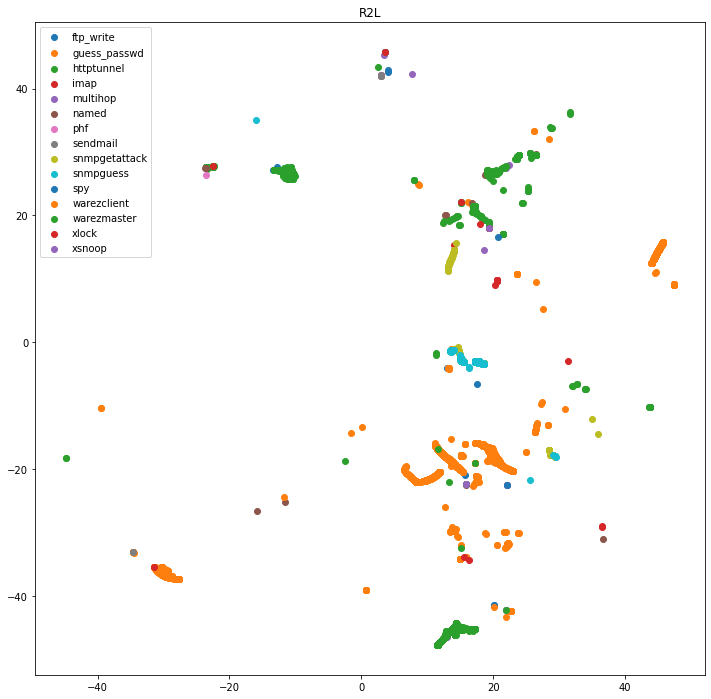

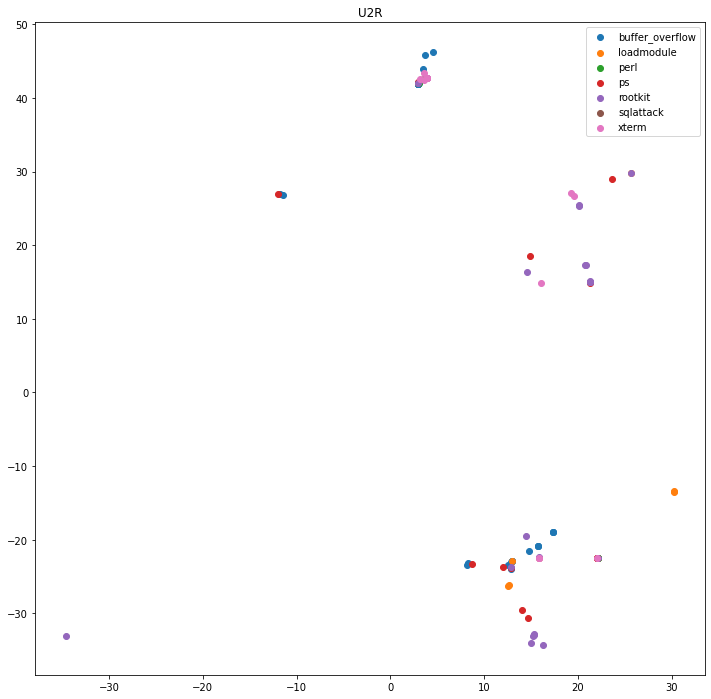

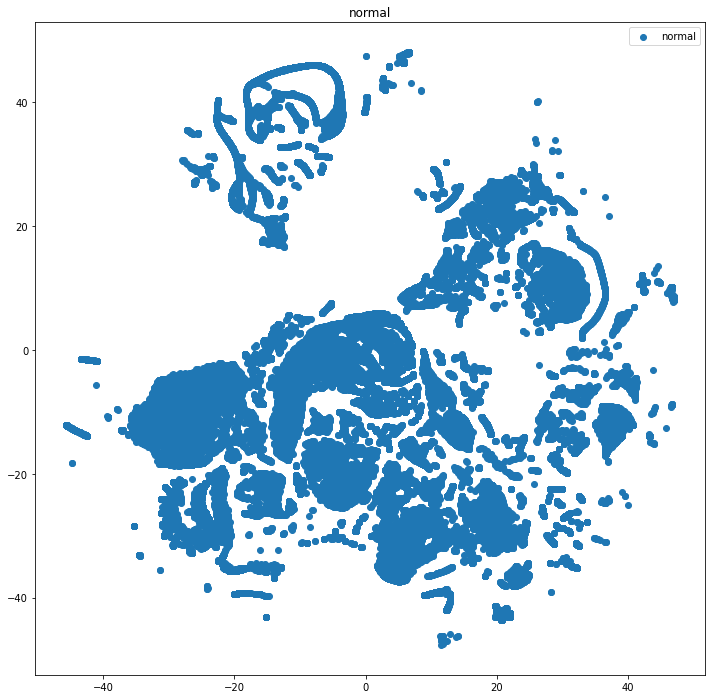

In [11]:
for grouped_class in attack_classes_grouped:
    mask = data_classes_grouped == grouped_class
    X_current = X[mask]

    labels_current = data_labels[mask]
    classes_current = data_classes[mask]
    
    plt.figure(figsize=(12, 12))
    for class_ in np.unique(classes_current):
        class_mask = classes_current == class_
        plt.scatter(X_current[class_mask, 0], X_current[class_mask, 1], label=class_)
        
    plt.title(grouped_class)
    plt.legend()
    plt.show()